In [1]:
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] =17
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams[ 'figure.dpi']= 100
plt.rcParams['axes.titlepad']= 15.0
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize'] ='small'

plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['lines.color'] = 'b'

plt.rcParams["legend.loc"] = 'upper right'

## Load data

In [3]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Checking for missing values

In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Convert datetime from string to datetime format
df['time'] = pd.to_datetime(df.datetime)
df = df.drop(columns = ['datetime'])

# Separating out different time scales
df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour
df['dow'] = df.time.dt.dayofweek


# Convert season and weather from numbers to descriptive text
df['season'] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter"})
df["weather"] = df.weather.map({1: " Clear",2 : " Mist + Cloudy", 3 : " Wet ",  4 :" Extreme " })

# Plot count of categorical variables

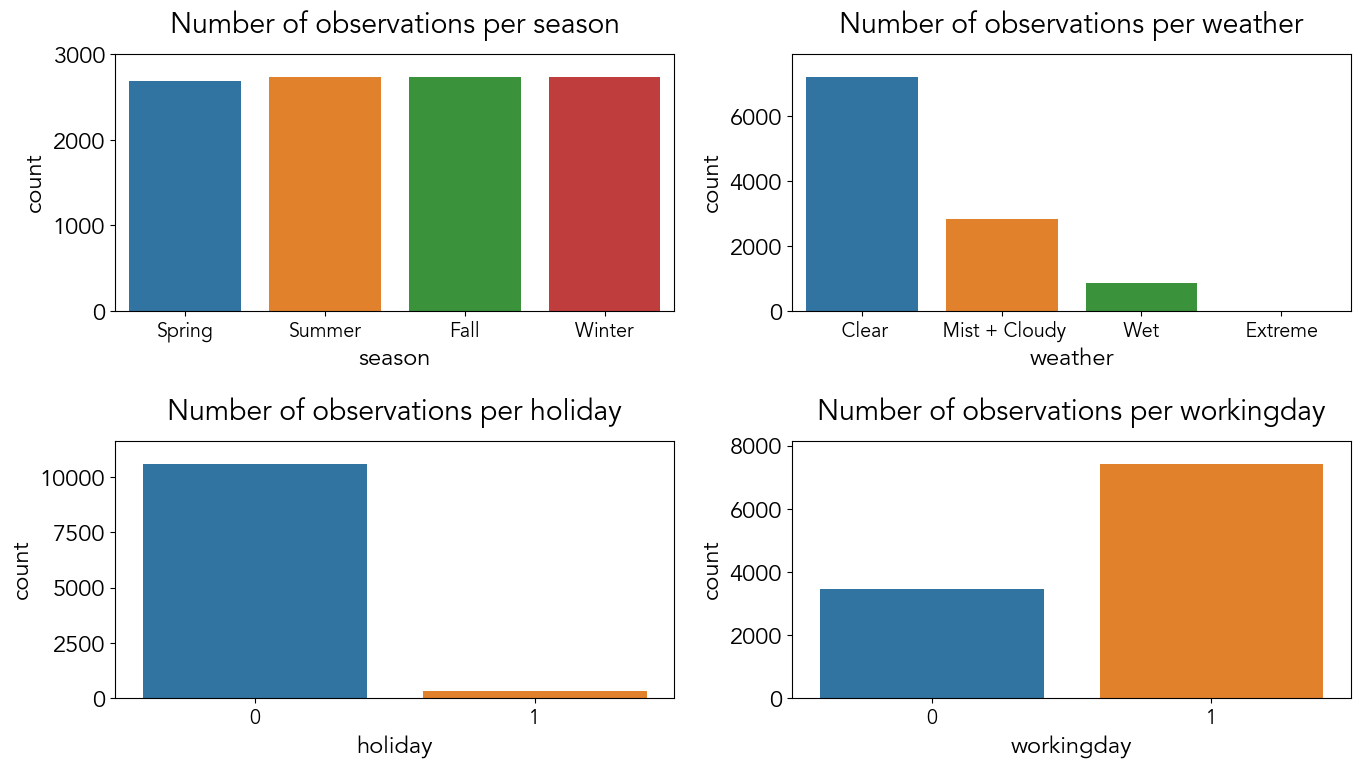

In [8]:
fig, axes = plt.subplots(figsize=(14,8), nrows=2,ncols=2)
sns.countplot(x='season',data=df, ax=axes[0][0])
axes[0][0].set_title('Number of observations per season')
sns.countplot(x='weather',data=df, ax=axes[0][1])
axes[0][1].set_title('Number of observations per weather')
sns.countplot(x='holiday',data=df, ax=axes[1][0])
axes[1][0].set_title('Number of observations per holiday')
sns.countplot(x='workingday',data=df, ax=axes[1][1])
axes[1][1].set_title('Number of observations per workingday')
plt.tight_layout()
plt.show()

# Engineering features

## Plotting distribution of bike share count value as a function of season, month, hour, working day, holiday, and weather

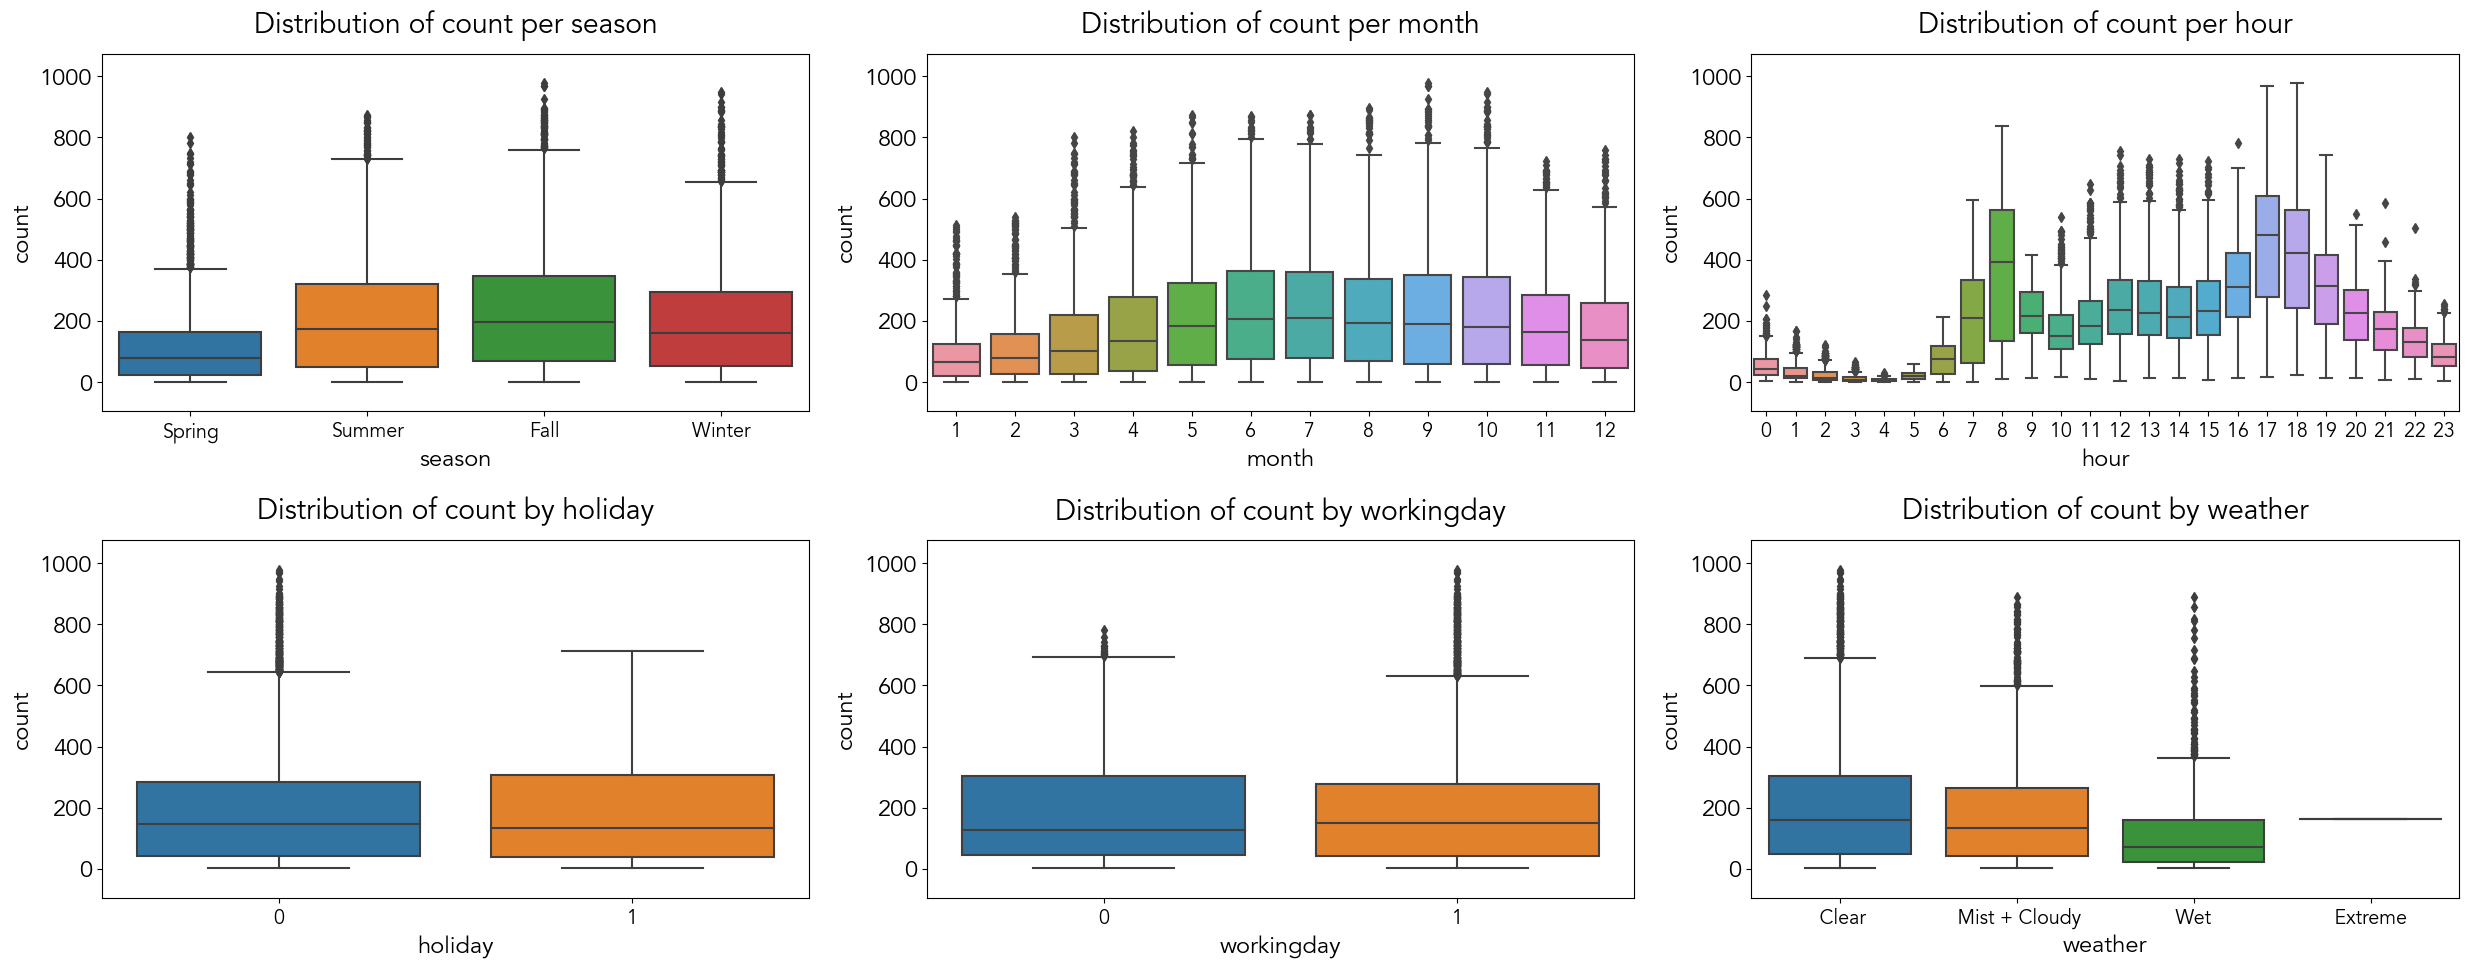

In [9]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(25, 10)

sns.boxplot(data=df,y="count",x="season",orient="v", ax=axes[0][0])
axes[0][0].set_title('Distribution of count per season')

sns.boxplot(data=df,y="count",x="month",orient="v",ax=axes[0][1])
axes[0][1].set_title('Distribution of count per month')

sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[0][2])
axes[0][2].set_title('Distribution of count per hour')


sns.boxplot(data=df,y="count",x="holiday",orient="v",ax=axes[1][0])
axes[1][0].set_title('Distribution of count by holiday')

sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])
axes[1][1].set_title('Distribution of count by workingday')

sns.boxplot(data=df,y="count",x="weather",orient="v",ax=axes[1][2])
axes[1][2].set_title('Distribution of count by weather')

plt.tight_layout()
plt.show()

## Plotting bike share count sum at different time intervals

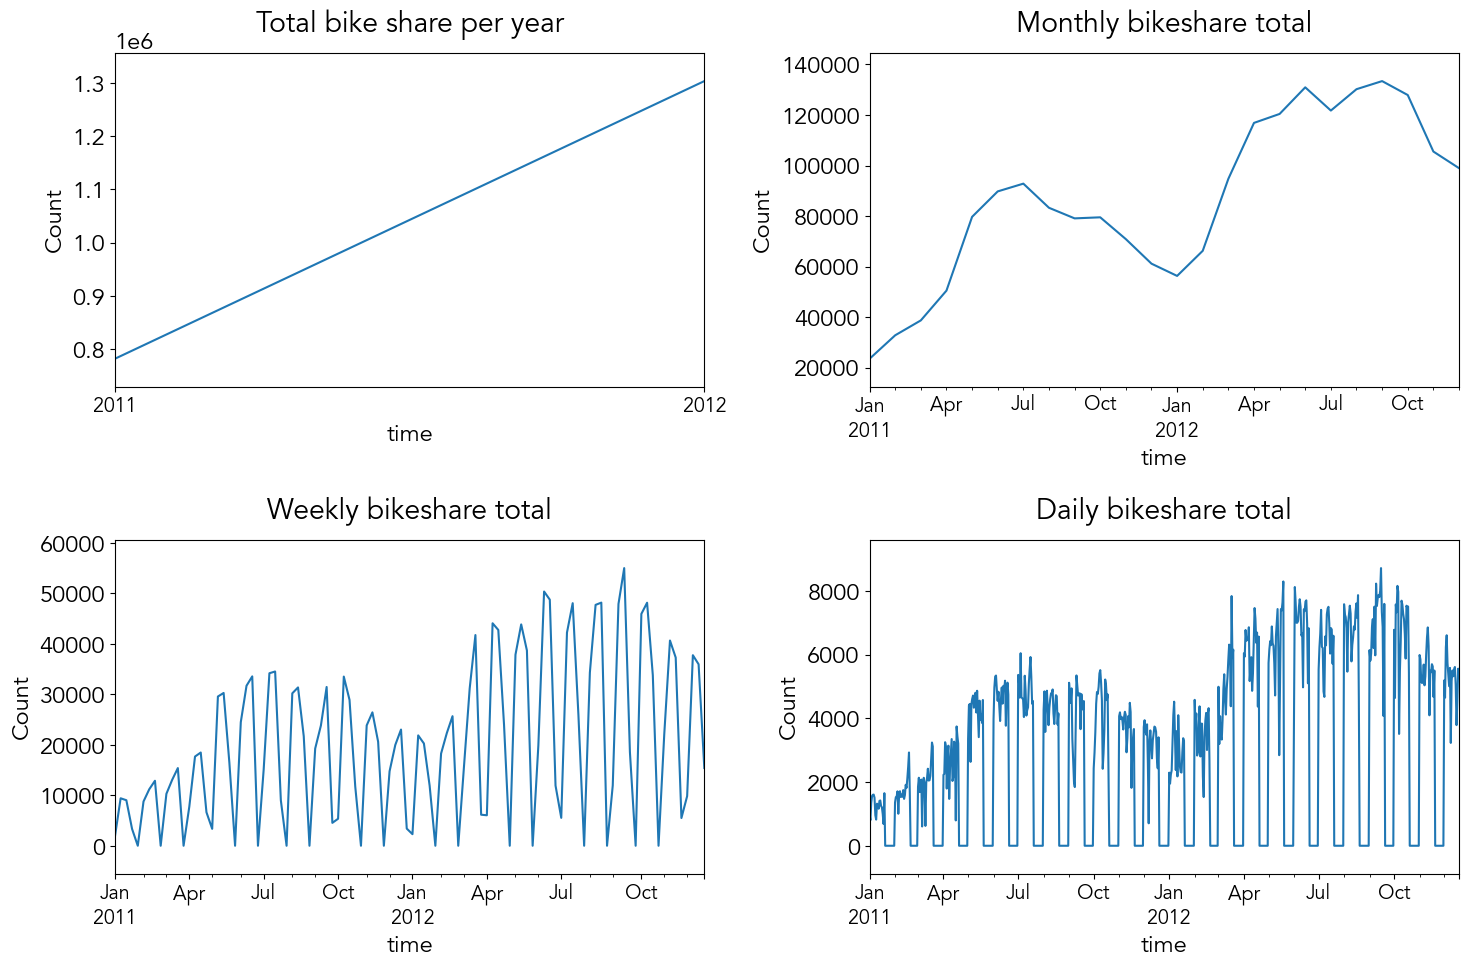

In [10]:
yearly = df.resample('Y', on='time').sum()
monthly = df.resample('M', on='time').sum()
weekly = df.resample('W', on='time').sum()
daily = df.resample('D', on='time').sum()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)

yearly['count'].plot(ax=axes[0][0])
axes[0][0].set_ylabel('Count')
axes[0][0].set_title('Total bike share per year')

monthly['count'].plot(ax=axes[0][1])
axes[0][1].set_ylabel('Count')
axes[0][1].set_title('Monthly bikeshare total')

weekly['count'].plot(ax=axes[1][0])
axes[1][0].set_ylabel('Count')
axes[1][0].set_title('Weekly bikeshare total')

daily['count'].plot(ax=axes[1][1])
axes[1][1].set_ylabel('Count')
axes[1][1].set_title('Daily bikeshare total')

plt.tight_layout()
plt.show()

## Impact of temp/atemp/humidity/windspeed vs hourly bikeshare count

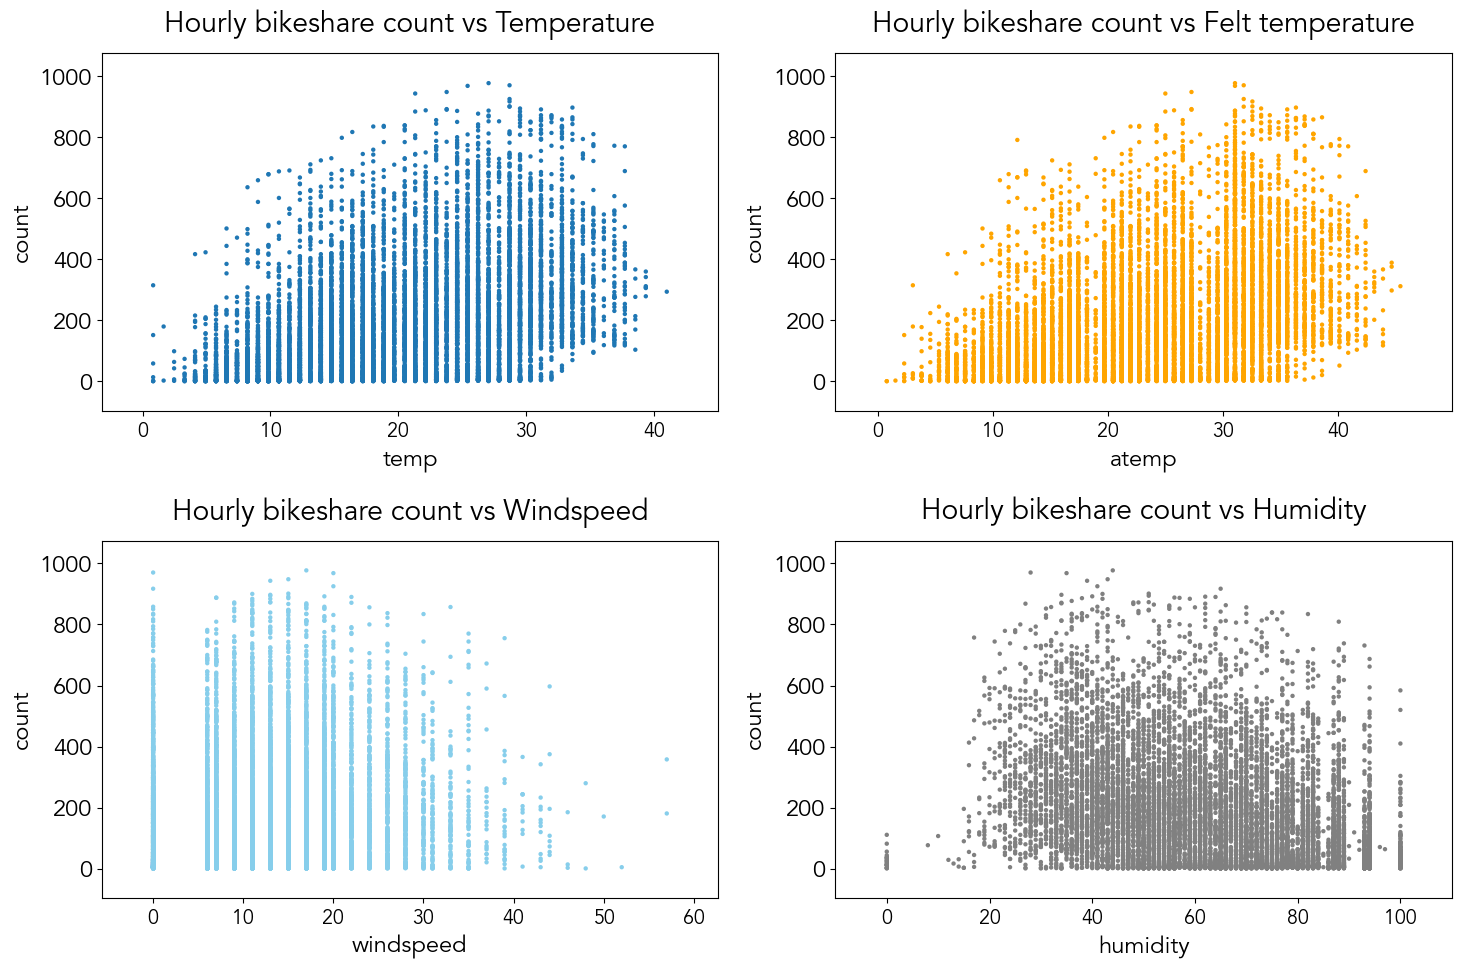

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(15, 10)

sns.scatterplot(x="temp", y="count", data=df,s=10, edgecolor="none", ax=axes[0][0])
axes[0][0].set_title('Hourly bikeshare count vs Temperature')

sns.scatterplot(x="atemp", y="count", color='orange',s=10,edgecolor="none",data=df,ax=axes[0][1])
axes[0][1].set_title('Hourly bikeshare count vs Felt temperature')

sns.scatterplot(x="windspeed", y="count", color='skyblue',s=10,edgecolor="none",data=df,ax=axes[1][0])
axes[1][0].set_title('Hourly bikeshare count vs Windspeed')

sns.scatterplot(x="humidity", y="count", color='gray', s=10,edgecolor="none",data=df,ax=axes[1][1])
axes[1][1].set_title('Hourly bikeshare count vs Humidity')

plt.tight_layout()
plt.show()

## Impact of season, weather, work day, holiday, day of week on hourly bike rental count

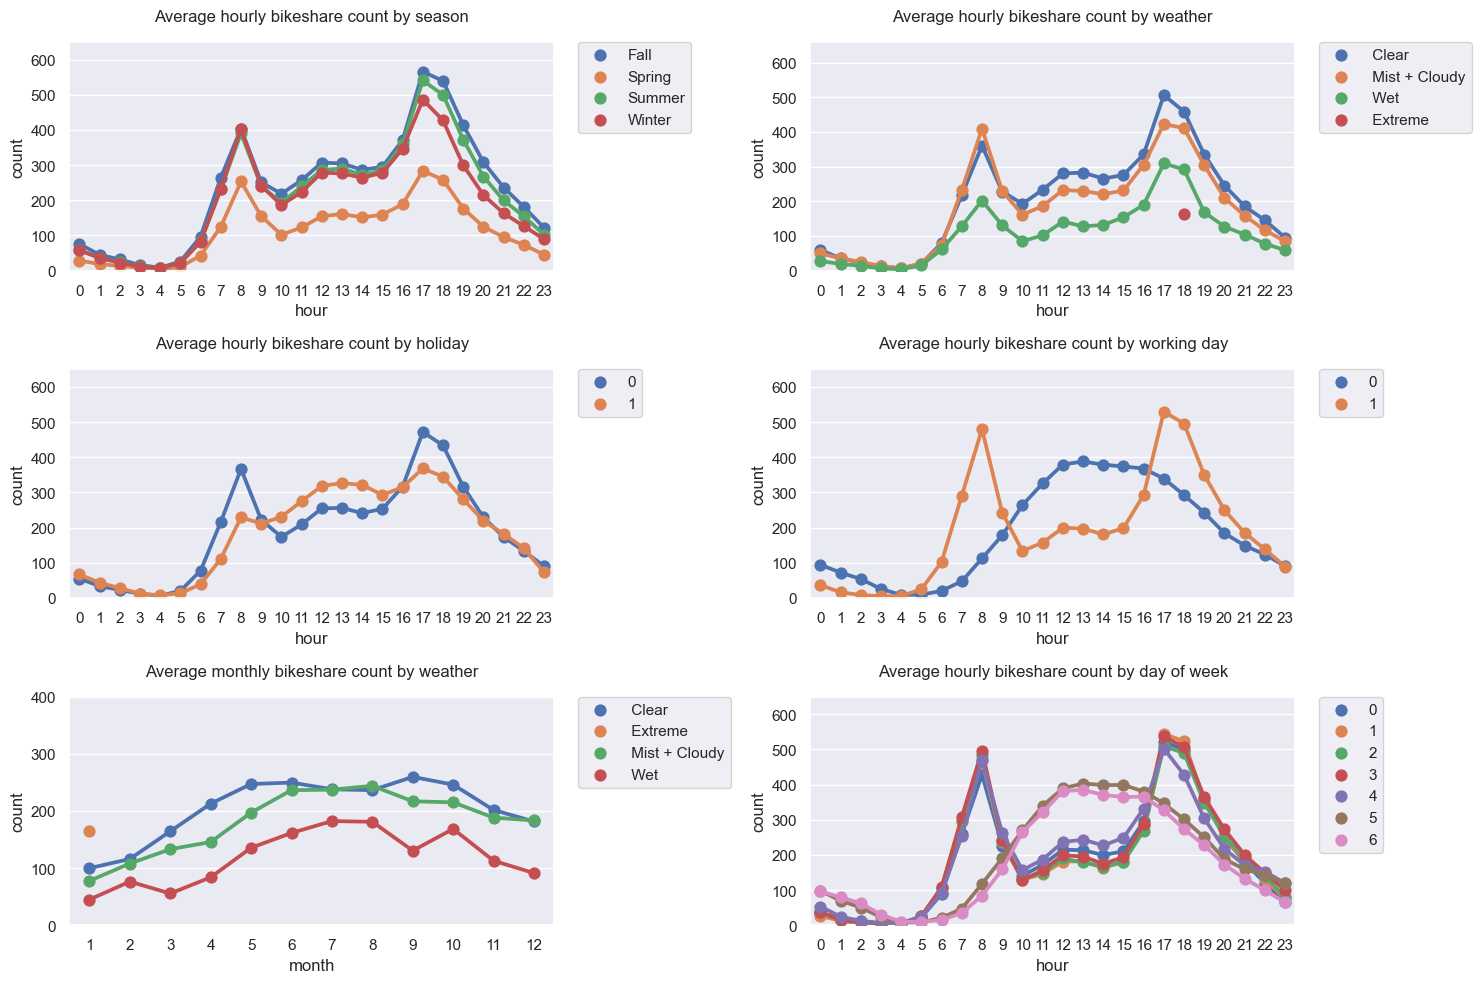

In [12]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(3,2)
fig.set_size_inches(15,10)

hourly = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourly["hour"], y=hourly["count"],hue=hourly["season"], data=hourly, join=True, ax=axes[0][0])
axes[0][0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0][0].set_ylim(0,650)
axes[0][0].set_title('Average hourly bikeshare count by season')

hourly = pd.DataFrame(df.groupby(["hour","weather"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourly["hour"], y=hourly["count"],hue=hourly["weather"], data=hourly, join=True, ax=axes[0][1])
axes[0][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0][1].set_ylim(0,660)
axes[0][1].set_title('Average hourly bikeshare count by weather')

monthly = pd.DataFrame(df.groupby(["month","weather"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=monthly["month"], y=monthly["count"],hue=monthly["weather"], data=monthly, join=True, ax=axes[2][0])
axes[2][0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[2][0].set_ylim(0,400)
axes[2][0].set_title('Average monthly bikeshare count by weather')

hourly = pd.DataFrame(df.groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourly["hour"], y=hourly["count"],hue=hourly["holiday"], data=hourly, join=True, ax=axes[1][0])
axes[1][0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1][0].set_ylim(0,650)
axes[1][0].set_title('Average hourly bikeshare count by holiday')

hourly = pd.DataFrame(df.groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourly["hour"], y=hourly["count"],hue=hourly["workingday"], data=hourly, join=True, ax=axes[1][1])
axes[1][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1][1].set_ylim(0,650)
axes[1][1].set_title('Average hourly bikeshare count by working day')

hourly = pd.DataFrame(df.groupby(["hour","dow"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourly["hour"], y=hourly["count"],hue=hourly["dow"], data=hourly, join=True, ax=axes[2][1])
axes[2][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[2][1].set_ylim(0,650)
axes[2][1].set_title('Average hourly bikeshare count by day of week')

plt.tight_layout()
plt.show()

# Correlation between features shown by correlation plot

In [13]:
cols = ['year', 'month', 'day', 'hour', 'dow', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed',   'time','count']

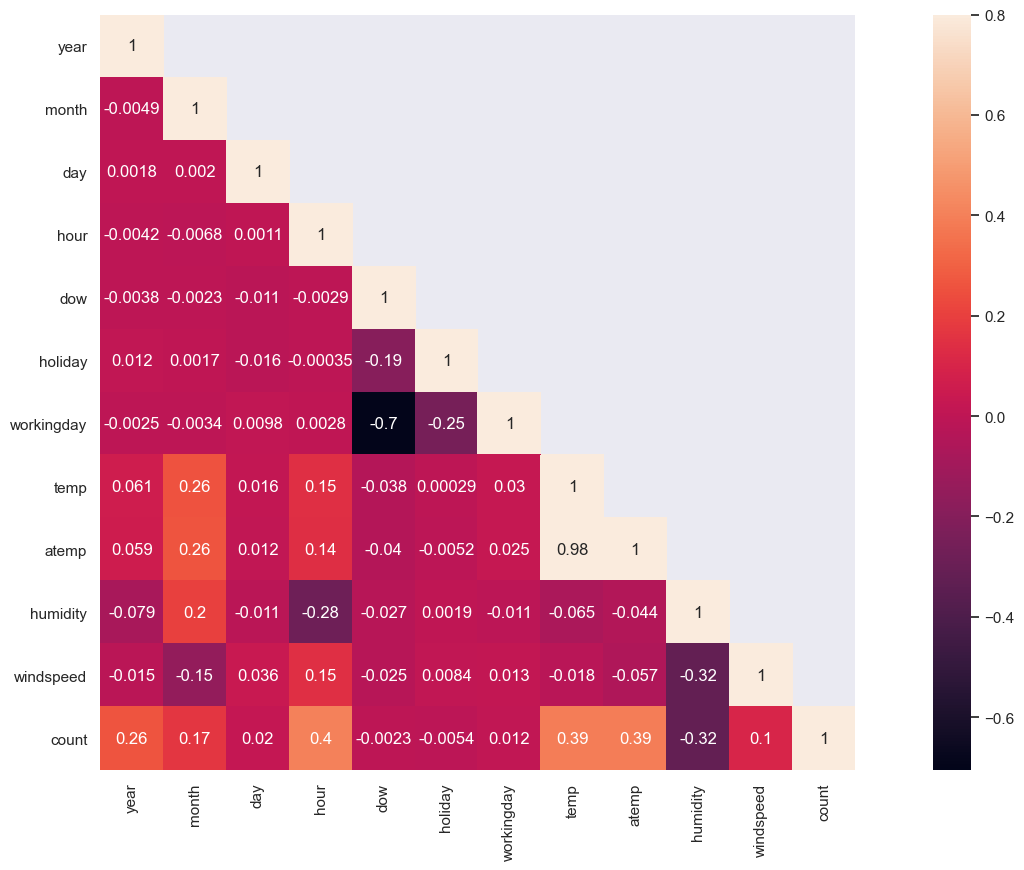

In [14]:
corrMatt = df[cols].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Distribution of temperatures across different hours of the day

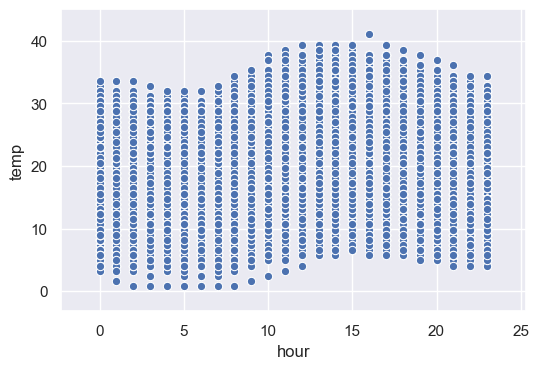

In [15]:
sns.scatterplot(df.hour, df.temp)

# Finalize columns to use in modeling

In [16]:
# Reload train and test sets
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [17]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 6493 non-null   int64  
 1   workingday              6493 non-null   int64  
 2   dow                     6493 non-null   int64  
 3   temp                    6493 non-null   float64
 4   humidity                6493 non-null   int64  
 5   windspeed               6493 non-null   float64
 6   season_Fall             6493 non-null   uint8  
 7   season_Spring           6493 non-null   uint8  
 8   season_Summer           6493 non-null   uint8  
 9   season_Winter           6493 non-null   uint8  
 10  weather_ Clear          6493 non-null   uint8  
 11  weather_ Extreme        6493 non-null   uint8  
 12  weather_ Mist + Cloudy  6493 non-null   uint8  
 13  weather_ Wet            6493 non-null   uint8  
 14  year_2011               6493 non-null   

In [18]:
# Featuring engineering on trainset
df['time'] = pd.to_datetime(df.datetime)
df = df.drop(columns = ['datetime'])

df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour
df['dow'] = df.time.dt.dayofweek

df['season'] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter"})
df["weather"] = df.weather.map({1: " Clear",2 : " Mist + Cloudy", 3 : " Wet ",  4 :" Extreme " })


cols = ['season','holiday', 'workingday', 'weather', 'count', 'year', 'month', 'hour', 'dow', 'temp',  'humidity', 'windspeed']
df = df[cols]

cat_features = ['season', 'weather', 'year', 'month', 'hour']
df = pd.get_dummies(df, columns=cat_features)

In [19]:
# Featuring engineering on testset
test_df['time'] = pd.to_datetime(test_df.datetime)
test_df = test_df.drop(columns = ['datetime'])

test_df['year'] = test_df.time.dt.year
test_df['month'] = test_df.time.dt.month
test_df['day'] = test_df.time.dt.day
test_df['hour'] = test_df.time.dt.hour
test_df['dow'] = test_df.time.dt.dayofweek

test_df['season'] = test_df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter"})
test_df["weather"] = test_df.weather.map({1: " Clear",2 : " Mist + Cloudy", 3 : " Wet ",  4 :" Extreme " })


cols = ['season','holiday', 'workingday', 'weather', 'year', 'month', 'hour', 'dow' ,'temp', 'humidity', 'windspeed']
test_df = test_df[cols]

cat_features = ['season','weather', 'year', 'month', 'hour']
test_df = pd.get_dummies(test_df, columns=cat_features)

## Saving final dataframe as .csv file for modeling

In [20]:
df.to_csv('final_train_df.csv', index=False)
test_df.to_csv('final_test_df.csv', index = False)